In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv(r'electric_vehicle_analytics.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(3000, 25)

In [4]:
df.head()

,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle_ID                        3000 non-null   int64  
 1   Make                              3000 non-null   object 
 2   Model                             3000 non-null   object 
 3   Year                              3000 non-null   int64  
 4   Region                            3000 non-null   object 
 5   Vehicle_Type                      3000 non-null   object 
 6   Battery_Capacity_kWh              3000 non-null   float64
 7   Battery_Health_%                  3000 non-null   float64
 8   Range_km                          3000 non-null   int64  
 9   Charging_Power_kW                 3000 non-null   float64
 10  Charging_Time_hr                  3000 non-null   float64
 11  Charge_Cycles                     3000 non-null   int64  
 12  Energy

In [6]:
pd.isnull(df).sum()

Vehicle_ID                          0
Make                                0
Model                               0
Year                                0
Region                              0
Vehicle_Type                        0
Battery_Capacity_kWh                0
Battery_Health_%                    0
Range_km                            0
Charging_Power_kW                   0
Charging_Time_hr                    0
Charge_Cycles                       0
Energy_Consumption_kWh_per_100km    0
Mileage_km                          0
Avg_Speed_kmh                       0
Max_Speed_kmh                       0
Acceleration_0_100_kmh_sec          0
Temperature_C                       0
Usage_Type                          0
CO2_Saved_tons                      0
Maintenance_Cost_USD                0
Insurance_Cost_USD                  0
Electricity_Cost_USD_per_kWh        0
Monthly_Charging_Cost_USD           0
Resale_Value_USD                    0
dtype: int64

In [7]:
df.columns

Index(['Vehicle_ID', 'Make', 'Model', 'Year', 'Region', 'Vehicle_Type',
       'Battery_Capacity_kWh', 'Battery_Health_%', 'Range_km',
       'Charging_Power_kW', 'Charging_Time_hr', 'Charge_Cycles',
       'Energy_Consumption_kWh_per_100km', 'Mileage_km', 'Avg_Speed_kmh',
       'Max_Speed_kmh', 'Acceleration_0_100_kmh_sec', 'Temperature_C',
       'Usage_Type', 'CO2_Saved_tons', 'Maintenance_Cost_USD',
       'Insurance_Cost_USD', 'Electricity_Cost_USD_per_kWh',
       'Monthly_Charging_Cost_USD', 'Resale_Value_USD'],
      dtype='object')

In [8]:
df.rename(columns={'Battery_Health_%': 'Battery_Health_Percentage'}, inplace=True)

In [9]:
df.describe()

,Vehicle_ID,Year,Battery_Capacity_kWh,Battery_Health_Percentage,Range_km,Charging_Power_kW,Charging_Time_hr,Charge_Cycles,Energy_Consumption_kWh_per_100km,Mileage_km,Avg_Speed_kmh,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2019.499667,74.810100,85.030000,374.414667,129.301000,1.203570,1107.009667,18.589740,125209.685667,65.674067,190.678333,6.707073,14.794133,15.025163,1104.199000,1495.469333,0.216467,418.814683,22257.038000
std,866.169729,2.848047,25.734079,8.589526,137.184112,68.742745,1.421866,510.834590,3.767421,70465.774772,20.305364,35.184232,1.880355,14.407087,8.455850,521.530356,585.919978,0.078383,312.389226,5594.979382
min,1.000000,2015.000000,30.000000,70.000000,121.000000,11.100000,0.140000,200.000000,12.000000,5046.000000,30.000000,130.000000,3.500000,-10.000000,0.610000,200.000000,500.000000,0.080000,7.990000,8506.000000
25%,750.750000,2017.000000,53.000000,77.775000,260.000000,70.900000,0.460000,674.750000,15.320000,65140.500000,48.000000,159.000000,5.080000,2.400000,7.817500,652.000000,984.750000,0.150000,175.485000,17813.000000
50%,1500.500000,2020.000000,74.850000,85.250000,371.000000,126.700000,0.720000,1116.000000,18.700000,125965.000000,65.600000,191.500000,6.720000,14.550000,15.115000,1109.000000,1496.000000,0.220000,347.285000,22154.000000
75%,2250.250000,2022.000000,96.900000,92.300000,476.250000,187.975000,1.292500,1535.250000,21.830000,184764.750000,83.525000,222.000000,8.310000,27.500000,22.170000,1569.000000,2019.250000,0.280000,595.152500,26732.750000
max,3000.000000,2024.000000,120.000000,100.000000,713.000000,250.000000,12.140000,1997.000000,24.990000,249987.000000,100.000000,249.000000,10.000000,40.000000,30.000000,1999.000000,2498.000000,0.350000,1643.700000,35521.000000


# Exploratory Data Analysis

## General Vehicle Analysis

> **How many unique makes and models are present in the dataset?**

In [10]:
nu = df[['Make','Model']].drop_duplicates()
nu.nunique().reset_index()

,index,0
0,Make,10
1,Model,23


> **What is the distribution of EV types (e.g., Sedan, SUV, Hatchback)?**

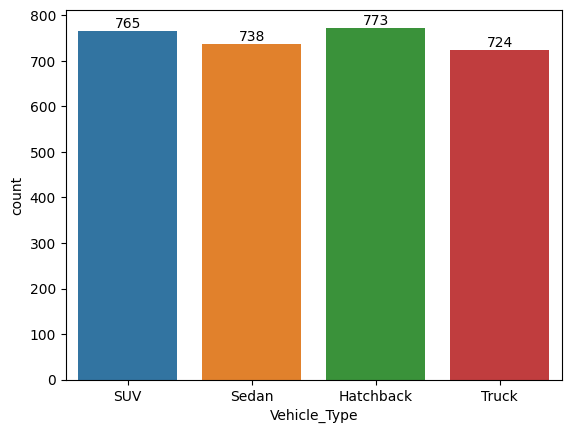

In [11]:
ax = sns.countplot(data=df, x='Vehicle_Type', hue= 'Vehicle_Type')

for bars in ax.containers:
    ax.bar_label(bars)

*From above graph most common vehicle_type is Hatchback*

> **Which regions have the highest number of EVs?**

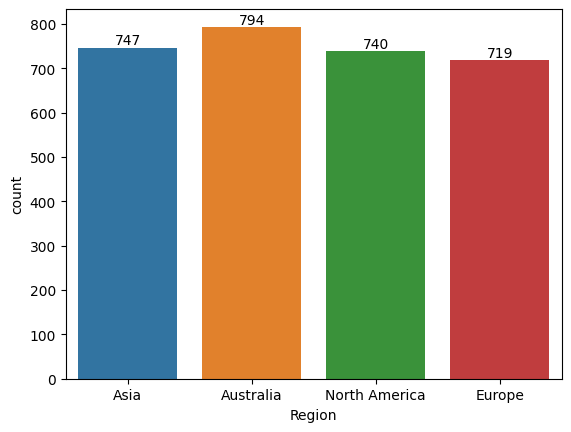

In [12]:
ax = sns.countplot(data=df, x='Region', hue='Region')

for bars in ax.containers:
    ax.bar_label(bars)

*From the above graph Australia has the highest number of EVs*

## Battery & Performance Analysis

> **What is the average battery capacity across vehicle types and regions?**

In [13]:
avg_btry_cap = df.groupby(['Vehicle_Type','Region'],as_index=False)['Battery_Capacity_kWh'].mean()

avg_btry_cap

,Vehicle_Type,Region,Battery_Capacity_kWh
0,Hatchback,Asia,72.411675
1,Hatchback,Australia,71.006931
2,Hatchback,Europe,74.367895
3,Hatchback,North America,76.837500
4,SUV,Asia,74.698361
5,SUV,Australia,73.646429
6,SUV,Europe,77.883146
7,SUV,North America,74.667788
8,Sedan,Asia,75.523913
9,Sedan,Australia,74.626500


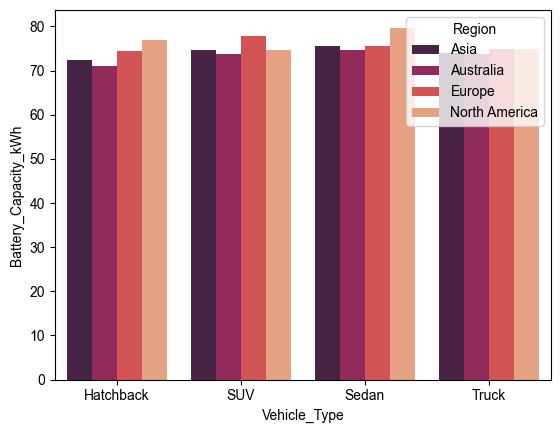

In [14]:
sns.barplot(x = 'Vehicle_Type',y= 'Battery_Capacity_kWh' , hue='Region', palette="rocket", data = avg_btry_cap)
sns.set(rc={'figure.figsize':(25,5)})

*From the above graph Vehicle_Type Hatchback, Sedan, Truck have max avg battery_capacity in the Region North America except SUV in the Europe Region*

> **What is the relationship between battery capacity and vehicle range (km)?**

In [15]:
df
condition= [
    (df['Battery_Capacity_kWh'].round()<31),
    (df['Battery_Capacity_kWh'].round()>=31) & (df['Battery_Capacity_kWh'].round()<=60),
    (df['Battery_Capacity_kWh'].round()>=61) & (df['Battery_Capacity_kWh'].round()<=90),
    (df['Battery_Capacity_kWh'].round()>=91) & (df['Battery_Capacity_kWh'].round()<=120),
    (df['Battery_Capacity_kWh'].round()>=121) & (df['Battery_Capacity_kWh'].round()<=150)
]

result= ["0–30", "31–60", "61–90", "91–120", "121–150"]

df['Battery_Capacity_Category'] = np.select(condition, result, default='Unknown')

df[['Battery_Capacity_Category','Battery_Capacity_kWh']]

,Battery_Capacity_Category,Battery_Capacity_kWh
0,91–120,101.7
1,0–30,30.1
2,91–120,118.5
3,31–60,33.1
4,61–90,81.3
...,...,...
2995,31–60,57.2
2996,91–120,98.4
2997,31–60,35.1
2998,61–90,69.4


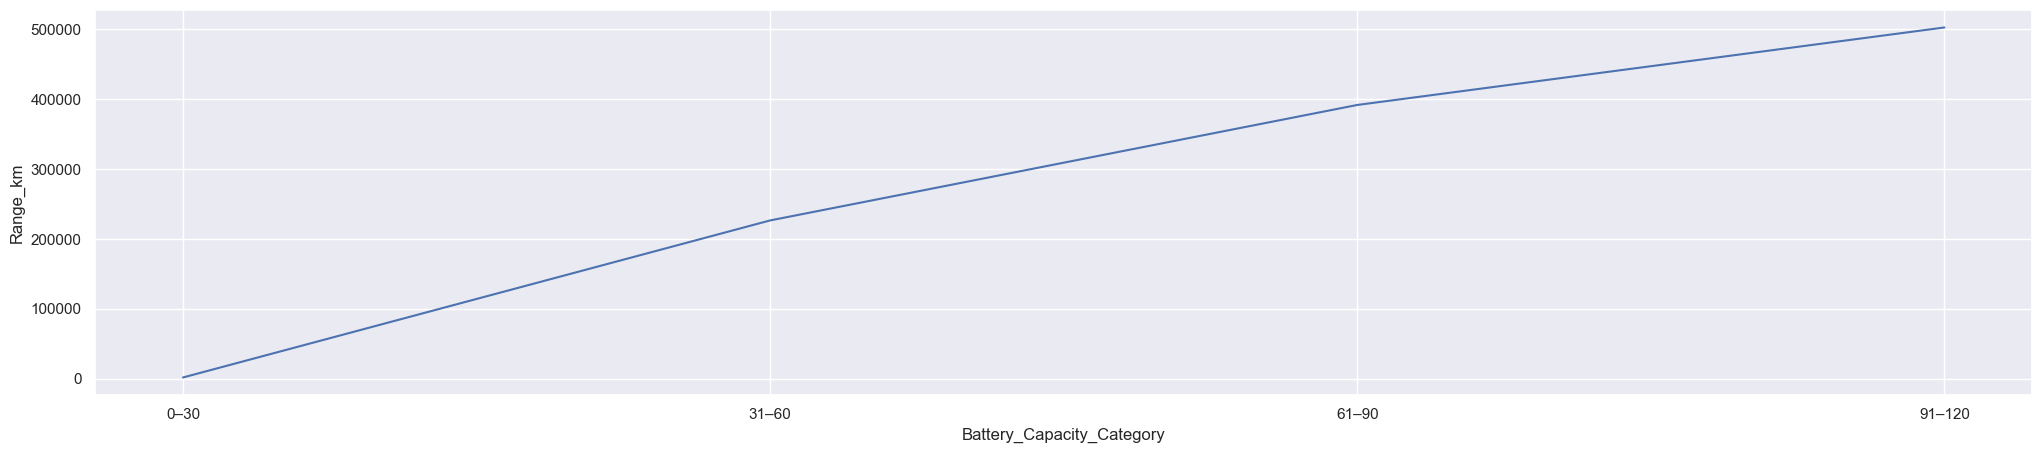

In [16]:
battery_health = df.groupby(['Battery_Capacity_Category'],as_index=False)['Range_km'].sum().sort_values(by='Range_km', ascending=True)

sns.lineplot(x="Battery_Capacity_Category", y="Range_km",
             data=battery_health)
sns.set(rc={'figure.figsize':(15,5)})

*From above graph it is clear that range of vehicle increases as Battery_Capacity increases or vice-versa*

> **Does battery health (%) decline with mileage?**

In [17]:
condition = [
    (df['Mileage_km'].round()<21000),
    (df['Mileage_km'].round()>=21000) & (df['Mileage_km'].round()<=50000),
    (df['Mileage_km'].round()>=51000) & (df['Mileage_km'].round()<=100000),
    (df['Mileage_km'].round()>=100001) & (df['Mileage_km'].round()<=200000),
    (df['Mileage_km'].round()>=200001) & (df['Mileage_km'].round()<=500000)
]

result =  ["0–20k", "21k–50k", "51k–100k", "101k–200k", "201k-500k"]
df['Mileage_Category'] = np.select(condition, result, default='500k+')

df[['Mileage_Category','Mileage_km']]

,Mileage_Category,Mileage_km
0,101k–200k,117727
1,101k–200k,161730
2,201k-500k,244931
3,51k–100k,57995
4,0–20k,17185
...,...,...
2995,101k–200k,130400
2996,0–20k,15175
2997,201k-500k,219055
2998,201k-500k,207916


In [18]:
battery_health = df.groupby(['Mileage_Category'],as_index=False)['Battery_Health_Percentage'].sum().sort_values(by='Battery_Health_Percentage', ascending= False)

battery_health

,Mileage_Category,Battery_Health_Percentage
1,101k–200k,104880.4
5,51k–100k,52091.9
2,201k-500k,48639.6
3,21k–50k,30050.4
0,0–20k,18352.7
4,500k+,1075.0


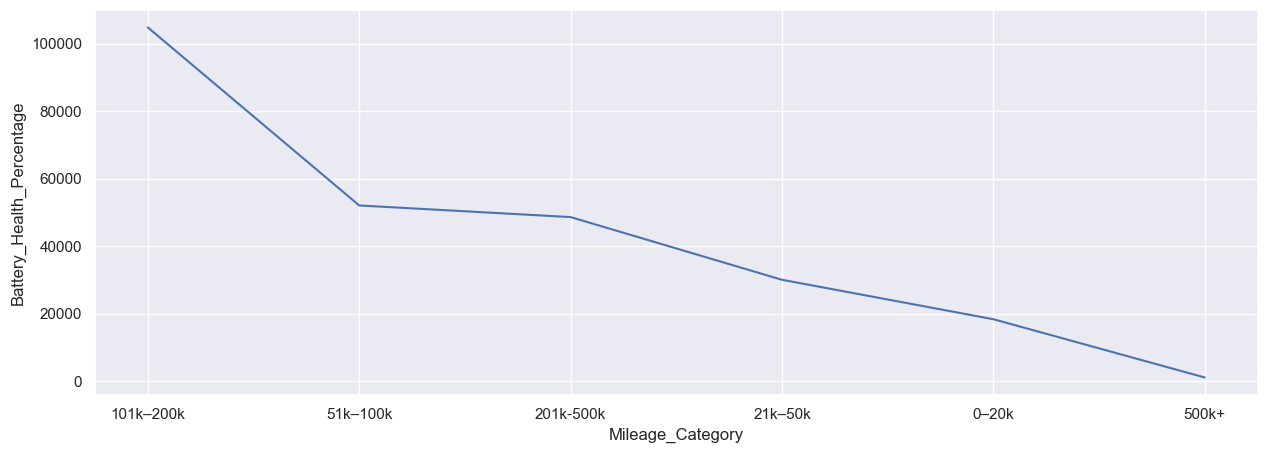

In [19]:
sns.lineplot(
    x='Mileage_Category',
    y='Battery_Health_Percentage',
    data=battery_health
)
sns.set(rc={'figure.figsize':(15,5)})

*The above graph clearly shows mileage decreases as battery health downgrades regardless of 51k-100k, 500k+ mileage category*

> **Which vehicles have the highest energy efficiency (lowest kWh per 100km)?**

In [20]:
highest_en_eff = df.groupby(['Vehicle_Type'],as_index=False)['Energy_Consumption_kWh_per_100km'].mean().sort_values(by='Energy_Consumption_kWh_per_100km', ascending=True)
highest_en_eff

,Vehicle_Type,Energy_Consumption_kWh_per_100km
3,Truck,18.505055
1,SUV,18.516078
2,Sedan,18.610352
0,Hatchback,18.722277


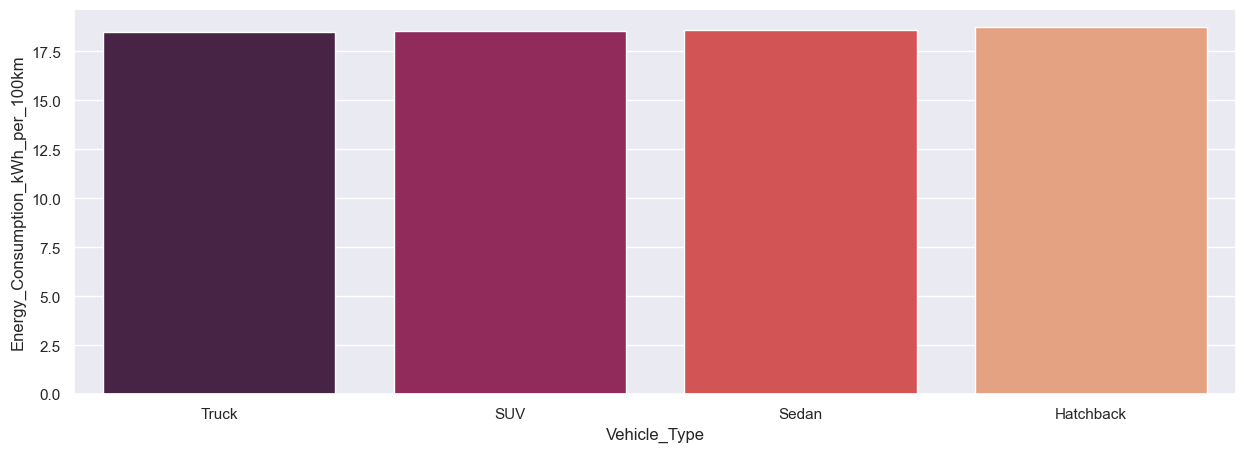

In [21]:
sns.barplot(
    x='Vehicle_Type',
    y='Energy_Consumption_kWh_per_100km',
    data=highest_en_eff,
    palette='rocket',
    hue='Vehicle_Type'
)
sns.set(rc={'figure.figsize':(15,5)})

*From the above graph Truck vehicle has highest energy efficiency*

> **How does temperature (°C) affect range or battery health?**

In [22]:
condition = [
    (df['Temperature_C'].round() >= start) & (df['Temperature_C'].round() <= end)
    for start, end in [(i, i+5) for i in range(-15, 50, 5)]
]

result= ['-15–-10', '-9–-5', '-4–0', '1–5', '6–10', '11–15', 
 '16–20', '21–25', '26–30', '31–35', '36–40', '41–45', '46–50']

df['Temperature_Category'] = np.select(condition, result, default='Unknown')

df[['Temperature_Category', 'Temperature_C']]

,Temperature_Category,Temperature_C
0,-9–-5,-9.0
1,1–5,1.6
2,1–5,1.5
3,11–15,12.5
4,-4–0,-3.0
...,...,...
2995,31–35,33.7
2996,11–15,13.7
2997,6–10,5.8
2998,-9–-5,-7.6


In [23]:
temperature = df.groupby(['Temperature_Category','Battery_Health_Percentage'],as_index=False)['Temperature_C'].mean().sort_values(by=['Temperature_C'], ascending=True)
temperature

,Temperature_Category,Battery_Health_Percentage,Temperature_C
26,-15–-10,94.6,-10.0
21,-15–-10,89.3,-10.0
18,-15–-10,87.0,-10.0
29,-15–-10,97.2,-9.9
31,-15–-10,100.0,-9.9
...,...,...,...
1607,36–40,79.3,39.8
1707,36–40,95.9,39.9
1685,36–40,92.1,39.9
1684,36–40,92.0,40.0


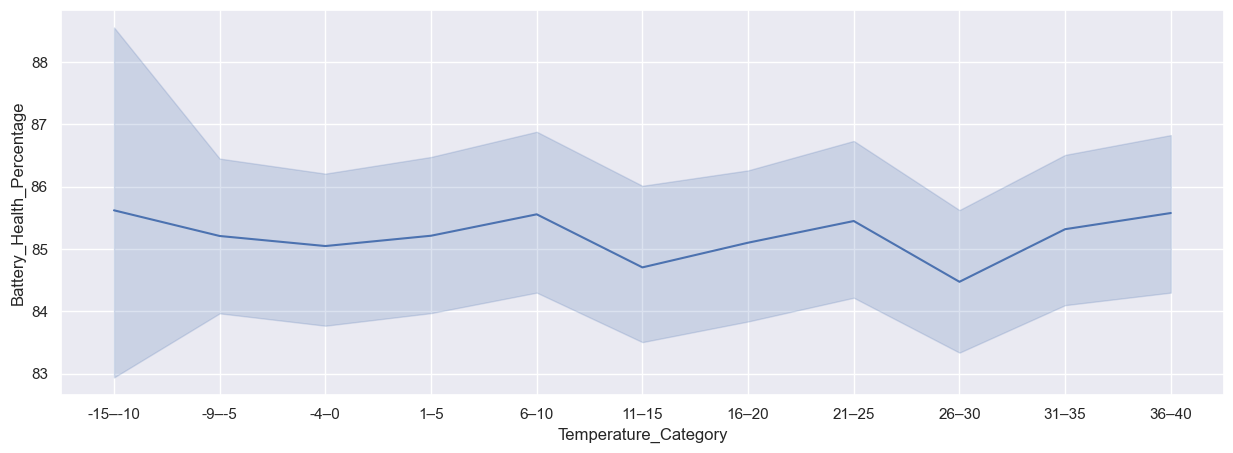

In [24]:
sns.lineplot(
    x='Temperature_Category',
    y='Battery_Health_Percentage',
    data=temperature ,
)
sns.set(rc={'figure.figsize':(15,5)})

*From above we can say battery health downgrades as temperature increases*

## Charging Behavior

> **What is the relationship between charging power (kW) and charging time (hr)?**

In [25]:
condition = [
    (df['Charging_Time_hr'].round() >= start) & (df['Charging_Time_hr'].round() <= end)
    for start, end in [(i, i+1) for i in range(0, 23, 2)]
]

result =[ "0-1", "2-3","4-5", "6-7","8-9","10-11", "12-13","14-15", "16-17","18-19", "20-21","22-23"]

df['Charging_Time_hr_Category'] = np.select(condition, result, default='Unknown')

df[['Charging_Time_hr_Category', 'Charging_Time_hr']]

,Charging_Time_hr_Category,Charging_Time_hr
0,0-1,0.82
1,0-1,0.27
2,0-1,0.84
3,0-1,0.25
4,0-1,0.43
...,...,...
2995,0-1,0.69
2996,0-1,0.74
2997,2-3,2.56
2998,0-1,0.90


In [26]:
charging_time_vs_power = df.groupby(['Charging_Time_hr_Category'],as_index=False)['Charging_Power_kW'].mean().sort_values(by='Charging_Power_kW', ascending=True)
charging_time_vs_power

,Charging_Time_hr_Category,Charging_Power_kW
2,12-13,11.450000
1,10-11,13.362500
6,8-9,14.500000
5,6-7,17.432203
4,4-5,24.814706
3,2-3,49.245602
0,0-1,152.624158


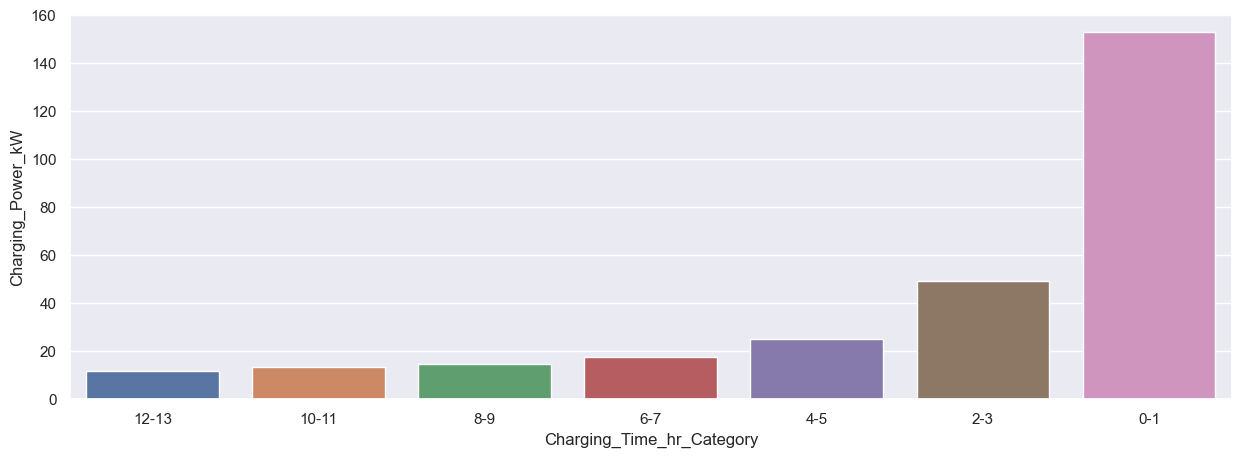

In [27]:
sns.barplot(
    x='Charging_Time_hr_Category',
    y='Charging_Power_kW',
    data=charging_time_vs_power,
    hue='Charging_Time_hr_Category'
)
sns.set(rc={'figure.figsize':(15,5)})

*Above graph shows Vehicles having less charging power, takes more time to charge as compared to vehicle with high charging power*

> **Which region has the highest average monthly charging cost?**

In [28]:
reg_mon_avg_ch_cost = df.groupby(['Region'],as_index=False)['Monthly_Charging_Cost_USD'].mean().sort_values(by='Monthly_Charging_Cost_USD', ascending=False)
reg_mon_avg_ch_cost

,Region,Monthly_Charging_Cost_USD
0,Asia,429.954083
2,Europe,429.933992
3,North America,410.965486
1,Australia,405.581045


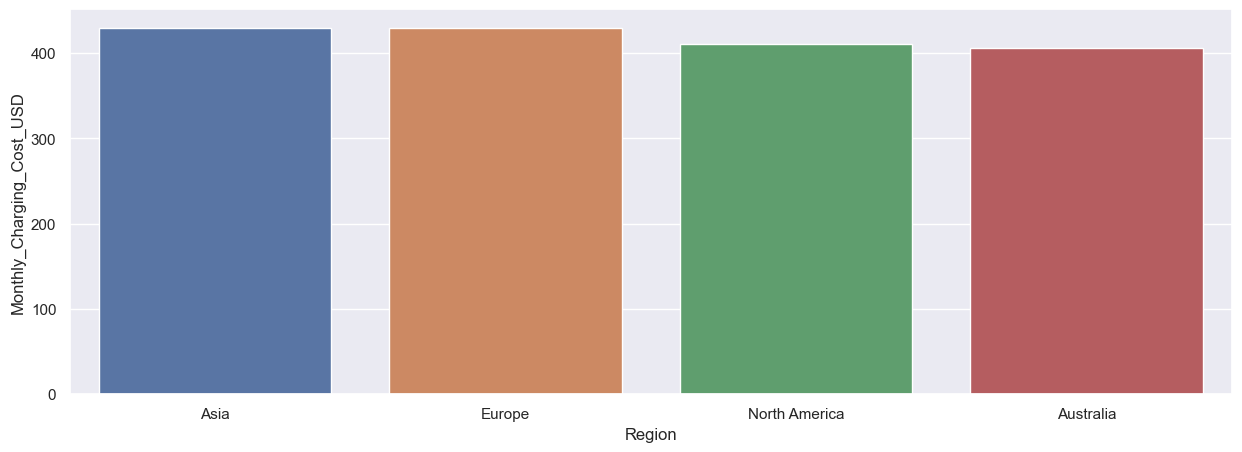

In [29]:
sns.barplot(
    x='Region',
    y='Monthly_Charging_Cost_USD',
    data=reg_mon_avg_ch_cost,
    hue='Region'
)
sns.set(rc={'figure.figsize':(15,5)})

*From above graph Asia region has highest avg. monthly charging cost*

> **Does range (km) vary with average charging cost (USD)?**

In [30]:
condition = [
    (df['Range_km'].round() >= start) & (df['Range_km'].round() <= end)
    for start, end in [(i, i+200) for i in range(0, 900, 200)]
]

result =[ "0-100", "200-300","400-500", "600-700","800-900"]

df['Range_km_Category'] = np.select(condition, result, default='Unknown')

df[['Range_km_Category', 'Range_km']]


,Range_km_Category,Range_km
0,400-500,565
1,0-100,157
2,600-700,677
3,0-100,149
4,400-500,481
...,...,...
2995,200-300,239
2996,400-500,498
2997,0-100,189
2998,200-300,336


In [31]:
avg_ch_cost_by_range = df.groupby(['Range_km_Category'], as_index=False)['Monthly_Charging_Cost_USD'].mean().sort_values(by='Monthly_Charging_Cost_USD' ,ascending= True)
avg_ch_cost_by_range

,Range_km_Category,Monthly_Charging_Cost_USD
0,0-100,412.266011
3,600-700,412.432222
1,200-300,416.507605
2,400-500,424.742835


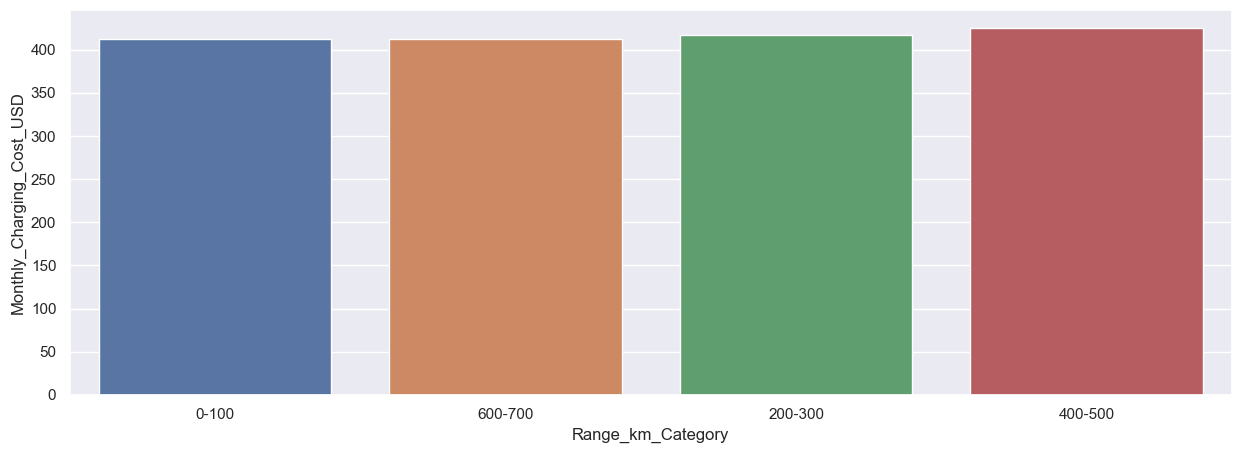

In [32]:
sns.barplot(
    x='Range_km_Category',
    y='Monthly_Charging_Cost_USD',
    data=avg_ch_cost_by_range,
    hue='Range_km_Category'
)
sns.set(rc={'figure.figsize':(15,5)})

*Above graph shows monthly charging cost increases as range inreases and range 400-500 has highest monthly charging cost*

## Usage & Driving Patterns

> **What is the distribution of average max speed across EVs?**

In [33]:
avg_spd_max_spd = df.groupby(['Vehicle_Type'], as_index=False)['Max_Speed_kmh'].mean().sort_values(by='Max_Speed_kmh', ascending=True)
avg_spd_max_spd

,Vehicle_Type,Max_Speed_kmh
0,Hatchback,189.856404
1,SUV,190.281046
3,Truck,190.357735
2,Sedan,192.265583


<Axes: xlabel='Vehicle_Type', ylabel='Max_Speed_kmh'>

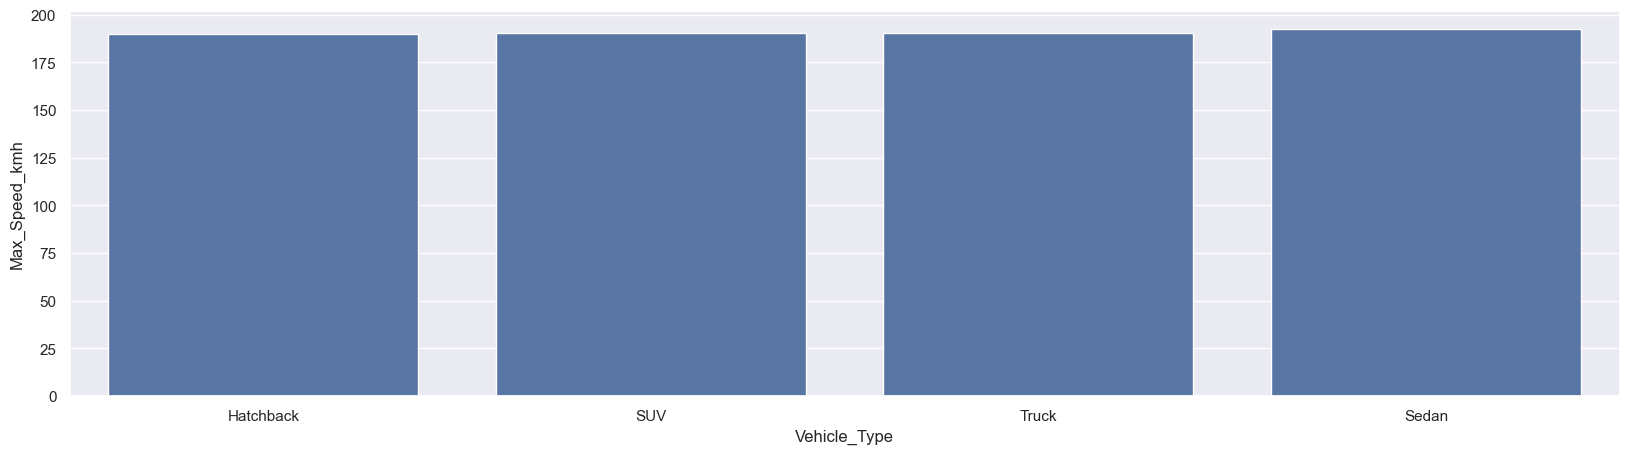

In [34]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = avg_spd_max_spd, x = 'Vehicle_Type',y= 'Max_Speed_kmh')

*From above we can see that Sedan has avg speed*

> **Does acceleration (0–100 km/h) correlate with max speed?**

In [35]:
condition = [
    (df['Acceleration_0_100_kmh_sec'].round() >= start) & (df['Acceleration_0_100_kmh_sec'].round() <= end)
    for start, end in [(i, i+2) for i in range(0, 11,2)]
]

result =[ "0-1", "2-3","4-5", "6-7","8-9","10-11"]

df['Acceleration_0_100_kmh_sec_category'] = np.select(condition, result, default='Unknown')

df[['Acceleration_0_100_kmh_sec_category', 'Acceleration_0_100_kmh_sec']]

,Acceleration_0_100_kmh_sec_category,Acceleration_0_100_kmh_sec
0,6-7,8.10
1,8-9,9.83
2,2-3,3.60
3,8-9,8.97
4,6-7,7.03
...,...,...
2995,6-7,7.98
2996,6-7,7.22
2997,2-3,4.26
2998,8-9,9.34


In [36]:
acc_spd_max_spd = df.groupby(['Acceleration_0_100_kmh_sec_category'], as_index=False)['Max_Speed_kmh'].mean().sort_values(by='Acceleration_0_100_kmh_sec_category', ascending=True)
acc_spd_max_spd

,Acceleration_0_100_kmh_sec_category,Max_Speed_kmh
0,2-3,188.694845
1,4-5,191.542952
2,6-7,190.845251
3,8-9,190.708955


<Axes: xlabel='Acceleration_0_100_kmh_sec_category', ylabel='Max_Speed_kmh'>

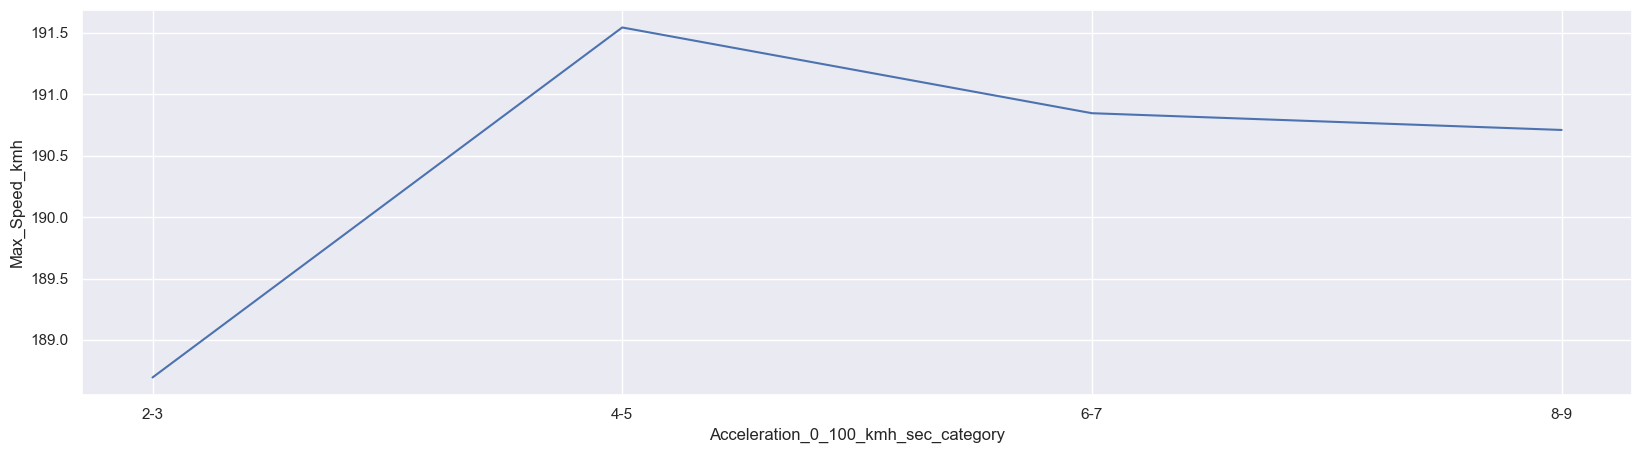

In [37]:
sns.set(rc={'figure.figsize':(20,5)})
sns.lineplot(data = acc_spd_max_spd, x = 'Acceleration_0_100_kmh_sec_category',y= 'Max_Speed_kmh')

*From above graph we can see that both speed and accelaration increases upto 4-5kmh_sec but soon beyond this limit max speed starts decreasing as speed increases*

> **How does usage type impact mileage and battery health?**

<Axes: xlabel='Usage_Type', ylabel='Battery_Health_Percentage'>

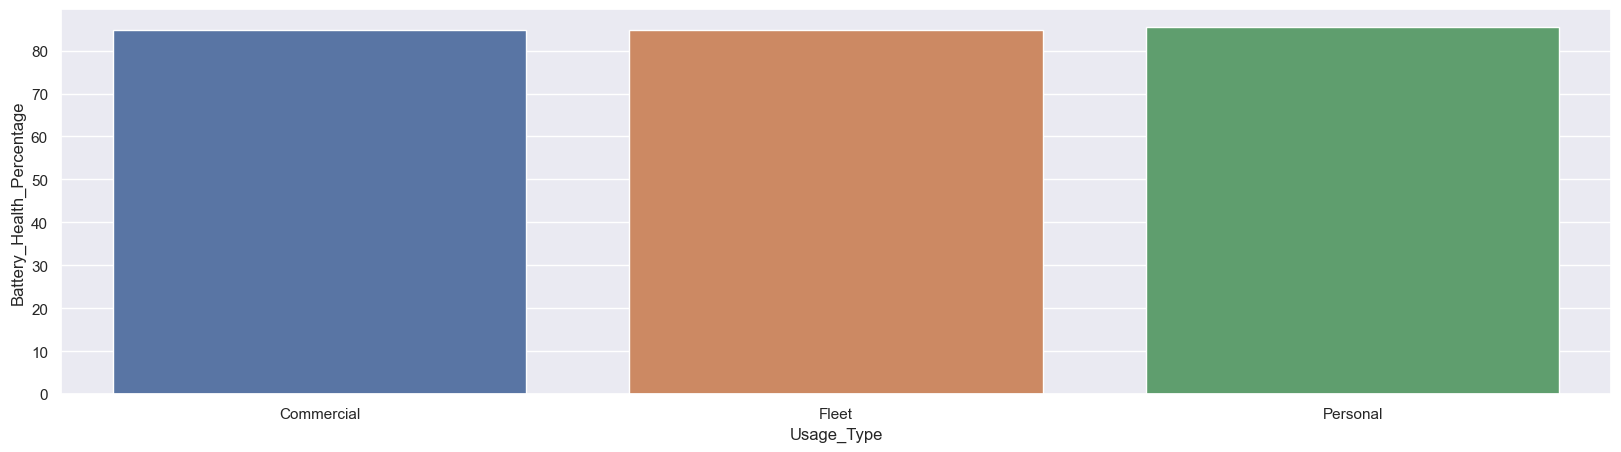

In [42]:
Usage_vs_health = df.groupby(['Usage_Type'], as_index=False)['Battery_Health_Percentage'].mean().sort_values(by='Battery_Health_Percentage', ascending=True)

sns.barplot(
    x='Usage_Type',
    y='Battery_Health_Percentage',
    data=Usage_vs_health,
    hue='Usage_Type'
)

<Axes: xlabel='Usage_Type', ylabel='Mileage_km'>

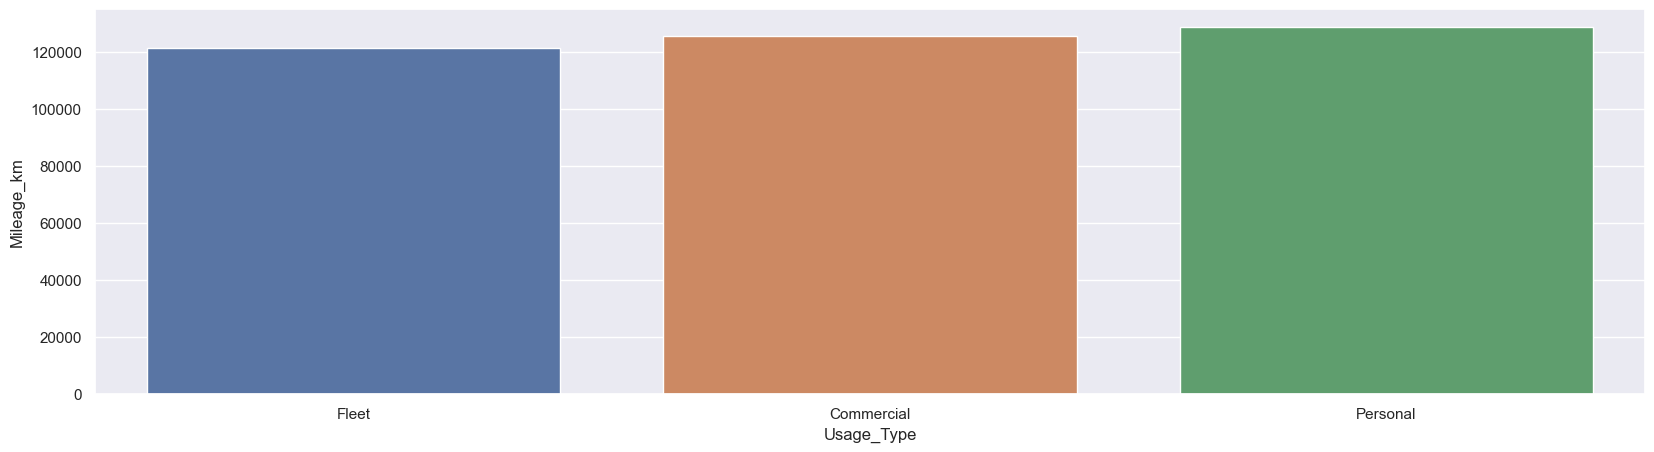

In [46]:
Usage_vs_mileage = df.groupby(['Usage_Type'], as_index=False)['Mileage_km'].mean().sort_values(by='Mileage_km', ascending=True)

sns.barplot(
    x='Usage_Type',
    y='Mileage_km',
    data=Usage_vs_mileage,
    hue='Usage_Type'
)

*From above graph Usage_vs_health, Usage_vs_mileage Personal Usage impapct more on battery health and mileage as compared to other usages*

> **What is the average maintenance and insurance cost per vehicle type?**

<Axes: xlabel='Vehicle_Type', ylabel='Maintenance_Cost_USD'>

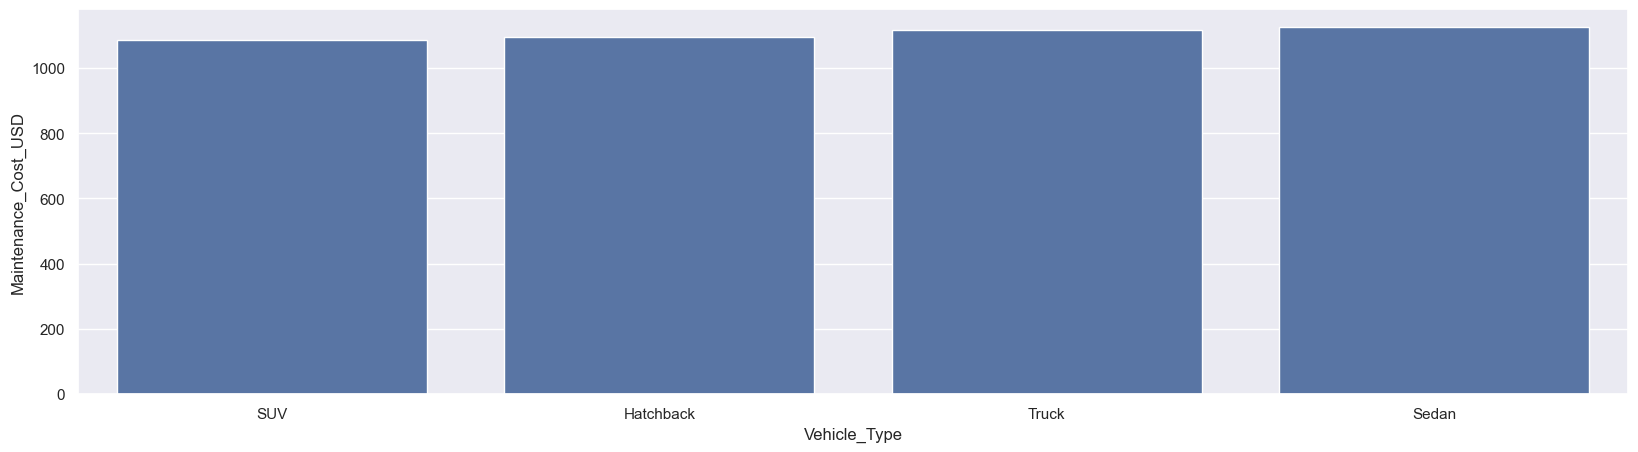

In [51]:
Vehicle_vs_maintenance = df.groupby(['Vehicle_Type'], as_index=False)['Maintenance_Cost_USD'].mean().sort_values(by='Maintenance_Cost_USD', ascending=True)

sns.barplot(
    x='Vehicle_Type',
    y='Maintenance_Cost_USD',
    data=Vehicle_vs_maintenance,
)

<Axes: xlabel='Vehicle_Type', ylabel='Insurance_Cost_USD'>

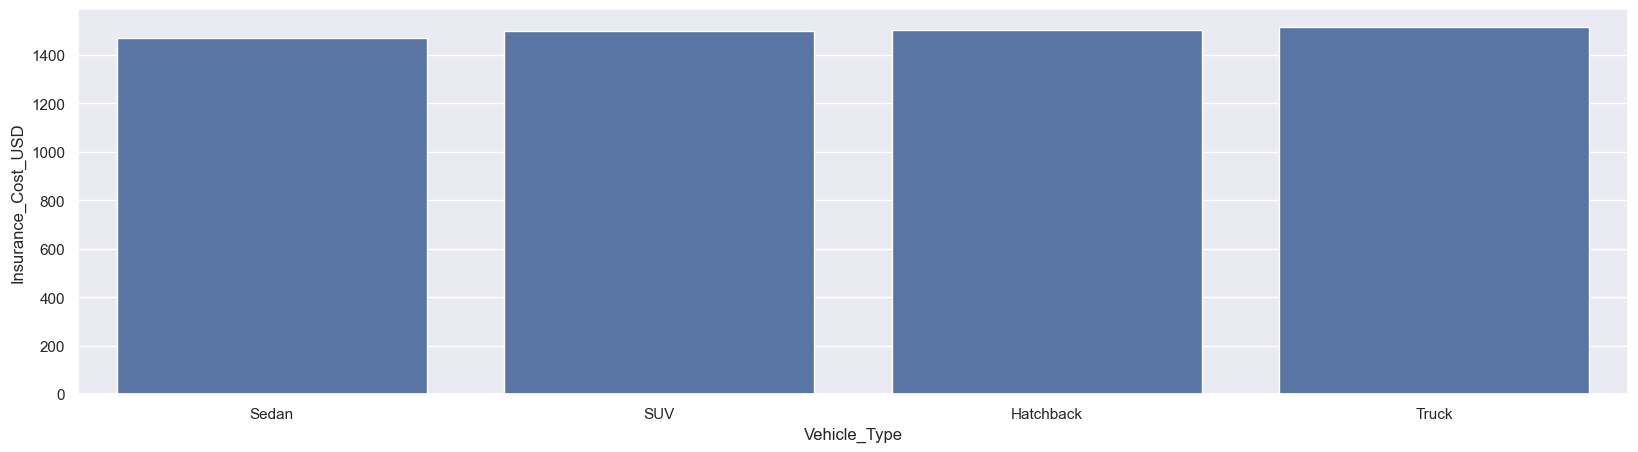

In [52]:
Vehicle_vs_insurance = df.groupby(['Vehicle_Type'], as_index=False)['Insurance_Cost_USD'].mean().sort_values(by='Insurance_Cost_USD', ascending=True)

sns.barplot(
    x='Vehicle_Type',
    y='Insurance_Cost_USD',
    data=Vehicle_vs_insurance,
)

*From above graph Vehicle_vs_maintenance, Vehicle_vs_insurance, we can say that Sedan has high maintenance and Truck has high insurance cost*

> **How does resale value change with mileage and battery health?**

In [66]:
condition = [
    (df['Battery_Health_Percentage'].round() >= start) & (df['Battery_Health_Percentage'].round() <= end)
    for start, end in [(i, i+20) for i in range(0, 110,20)]
]

result =[ "0-10", "20-30","40-50", "60-70","80-90","100-110"]

df['Battery_Health_Percentage_Category'] = np.select(condition, result, default='Unknown')

df[['Battery_Health_Percentage_Category', 'Battery_Health_Percentage']]

,Battery_Health_Percentage_Category,Battery_Health_Percentage
0,60-70,75.5
1,80-90,99.8
2,80-90,84.0
3,80-90,97.3
4,80-90,85.6
...,...,...
2995,80-90,84.0
2996,80-90,83.1
2997,80-90,82.1
2998,80-90,98.4


<Axes: xlabel='Battery_Health_Percentage_Category', ylabel='Resale_Value_USD'>

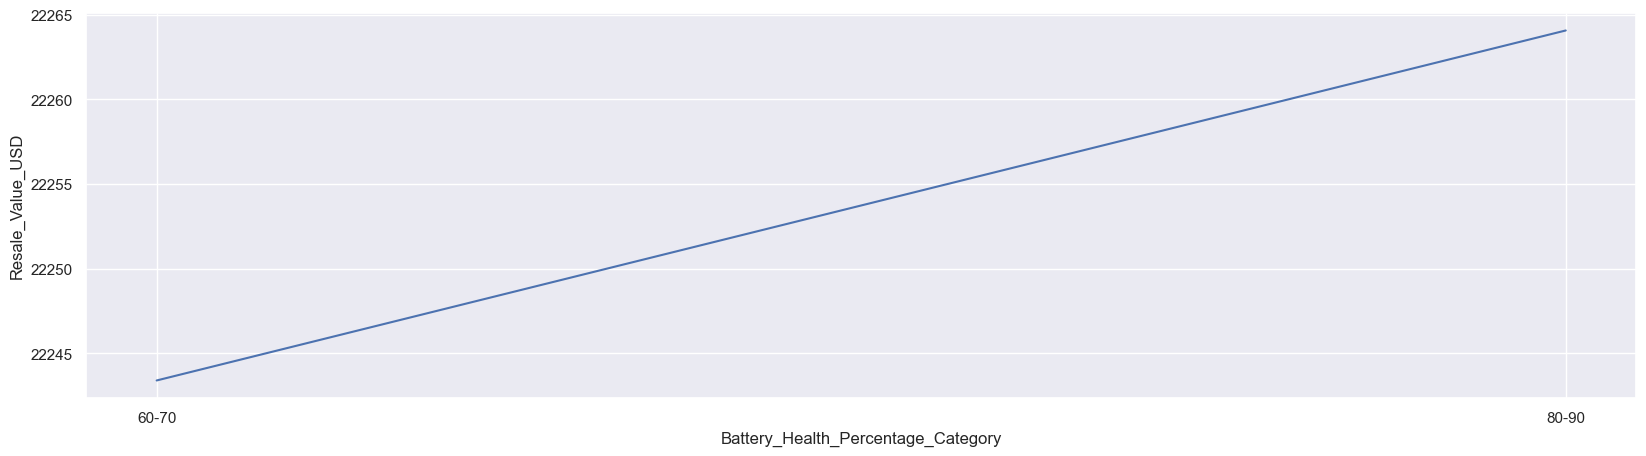

In [69]:
Resale_vs_health = df.groupby(['Battery_Health_Percentage_Category'], as_index=False)['Resale_Value_USD'].mean().sort_values(by='Resale_Value_USD', ascending=True)

sns.lineplot(
    x='Battery_Health_Percentage_Category',
    y='Resale_Value_USD',
    data=Resale_vs_health,
)

<Axes: xlabel='Mileage_Category', ylabel='Resale_Value_USD'>

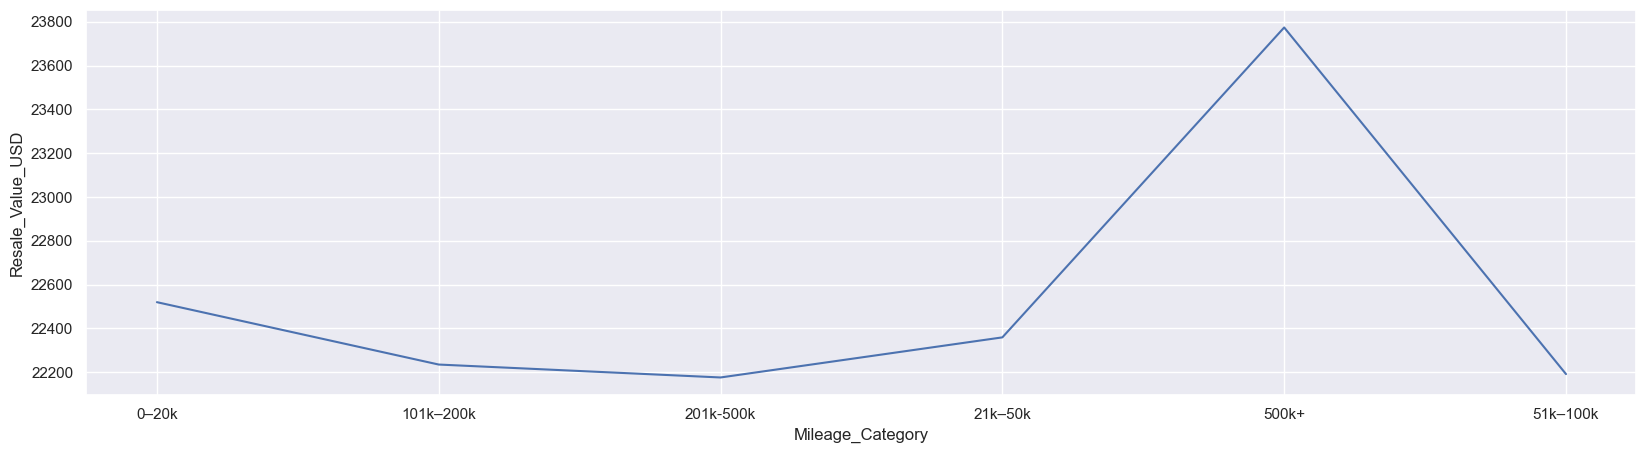

In [64]:
Resale_vs_mileage = df.groupby(['Mileage_Category'], as_index=False)['Resale_Value_USD'].mean().sort_values(by=['Mileage_Category'], ascending=True)

sns.lineplot(
    x='Mileage_Category',
    y='Resale_Value_USD',
    data=Resale_vs_mileage,
)

*From above graph Resale_vs_health, Resale_vs_mileage we can say that greater battery health and lower distance travelled vehicles have highest resale_value.*

> **Is there a relationship between CO₂ saved (tons) and resale value?**

In [74]:
condition = [
    (df['CO2_Saved_tons'].round() >= start) & (df['CO2_Saved_tons'].round() <= end)
    for start, end in [(i, i+5) for i in range(0, 31,5)]
]
result=['0–5', '6–10', '11–15', '16–20', '21–25', '26–30', '31']

df['CO2_Saved_tons_category'] = np.select(condition, result, default='Unknown')

df[['CO2_Saved_tons_category', 'CO2_Saved_tons']]

,CO2_Saved_tons_category,CO2_Saved_tons
0,11–15,14.13
1,16–20,19.41
2,26–30,29.39
3,6–10,6.96
4,0–5,2.06
...,...,...
2995,16–20,15.65
2996,0–5,1.82
2997,26–30,26.29
2998,21–25,24.95


In [93]:
CO2_vs_resale_value = df.groupby(['CO2_Saved_tons_category'], as_index=False)['Resale_Value_USD'].mean().sort_values(by='Resale_Value_USD', ascending=True)
CO2_vs_resale_value

,CO2_Saved_tons_category,Resale_Value_USD
1,11–15,21903.528942
4,26–30,22030.672170
3,21–25,22141.450000
0,0–5,22405.066038
5,6–10,22420.717899
2,16–20,22573.977401


<Axes: xlabel='CO2_Saved_tons_category', ylabel='Resale_Value_USD'>

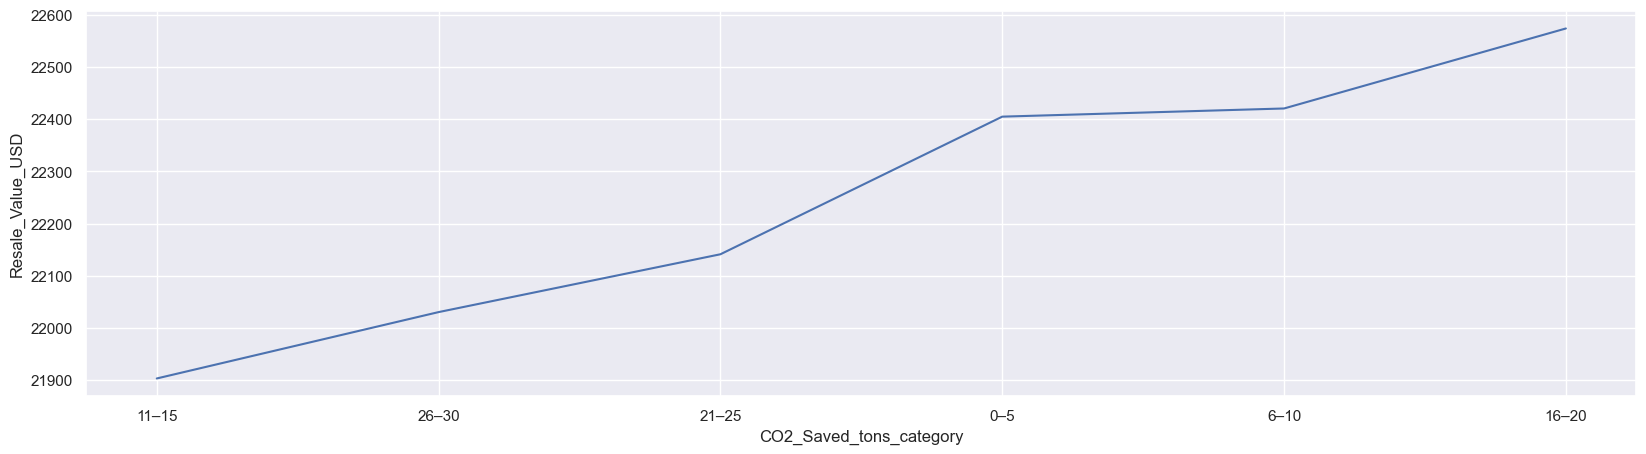

In [94]:
sns.lineplot(
    x='CO2_Saved_tons_category',
    y='Resale_Value_USD',
    data=CO2_vs_resale_value,
)

*From above graph there is no direct relationship between CO2 emmision and resale value. If we consider generally vehicle saved high CO2 has high resale value*

>**Which region has the highest total CO₂ savings?**

In [101]:
CO2_vs_region = df.groupby(['Region'], as_index=False)['CO2_Saved_tons'].sum().sort_values(by='CO2_Saved_tons', ascending=True)
CO2_vs_region

,Region,CO2_Saved_tons
3,North America,10973.79
2,Europe,11005.78
0,Asia,11277.96
1,Australia,11817.96


<Axes: xlabel='Region', ylabel='CO2_Saved_tons'>

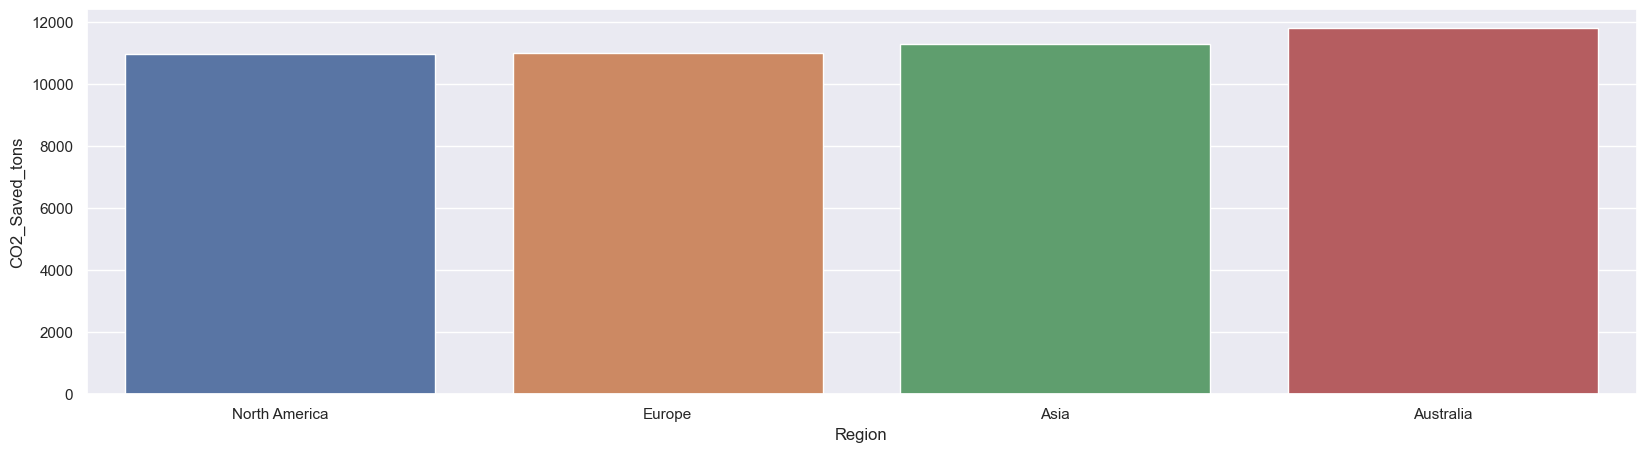

In [103]:
sns.barplot(
    x='Region',
    y='CO2_Saved_tons',
    data=CO2_vs_region,
    hue='Region'
)

*From above graph we can say Australia saved highest CO2*

>**Does higher energy efficiency (kWh/100km) correlate with more CO₂ saved?**

In [116]:
df.columns
CO2_vs_en_eff = df.groupby(['CO2_Saved_tons_category'], as_index=False)['Energy_Consumption_kWh_per_100km'].mean().sort_values(by='CO2_Saved_tons_category', ascending=True)
CO2_vs_en_eff

,CO2_Saved_tons_category,Energy_Consumption_kWh_per_100km
0,0–5,18.718019
1,11–15,18.596367
2,16–20,18.552787
3,21–25,18.740040
4,26–30,18.482476
5,6–10,18.431459


<Axes: xlabel='CO2_Saved_tons_category', ylabel='Energy_Consumption_kWh_per_100km'>

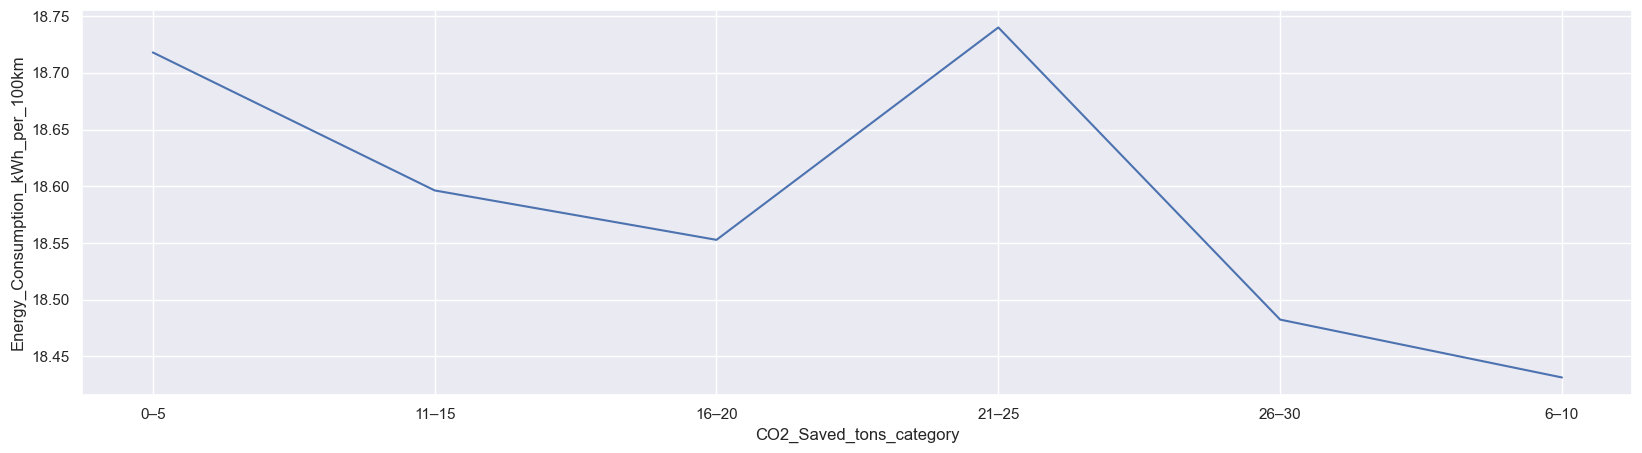

In [117]:
sns.lineplot(
    x='CO2_Saved_tons_category',
    y='Energy_Consumption_kWh_per_100km',
    data=CO2_vs_en_eff,
)

From above graph we can say that higher energy consumption results in lower CO2 Saving or vice-versa

# Conclusion

*Vehicles with great battery health, less CO2 emmision, high mileage, low energy consumption, low maintenance cost, low insurance cost, low charging cost,
high charging power have high resale value and market reach*